# Overview of Sentence Transformer
SentenceTransformers is a Python toolkit designed for generating advanced embeddings for sentences, texts, and images. Refer to [paper](https://arxiv.org/abs/1908.10084)

You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity to find sentences with a similar meaning. This can be useful for semantic textual similarity, semantic search, or paraphrase mining.

It offers large number of pre-trained models tuned for various tasks.
You can [check here](https://www.sbert.net/docs/pretrained_models.html).

## Use cases of sentence transformers
- Sentence Embedding
- Sentence Similarity
- Semantic Search
- Clustering  
    


In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 1.4 MB/s eta 0:00:00


## Generate Embedding

In [2]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
sentences = ['The first sentence is good', 'The second sentence is associated with the first sentence']
embeddings = model.encode(sentences)

for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("Embedding length: ", len(embedding))
    print("")

Sentence: The first sentence is good
Embedding: [ 1.97410099e-02  5.67010716e-02  3.49401273e-02  7.32374489e-02
 -2.55608838e-02  7.59562384e-03  5.27346805e-02 -1.43664423e-02
 -1.70875173e-02  6.42313389e-03  1.15055501e-01 -3.97102237e-02
 -1.92130525e-02  2.72353627e-02 -1.16234105e-02  2.25002714e-03
  1.08177967e-01 -2.75048167e-02 -1.75770558e-02  2.75135227e-02
 -4.82137688e-02  3.16172168e-02  8.01757798e-02  7.45217723e-04
 -6.39289320e-02  8.10066797e-03  4.24734643e-03  1.84805263e-02
  4.68371063e-02  1.59383360e-02 -6.00014590e-02 -3.92139405e-02
  5.07833213e-02  5.38232997e-02  1.21968566e-02 -5.98502695e-04
  3.57371308e-02  1.70940273e-02 -7.01244455e-03 -4.22069523e-03
  2.82151774e-02 -9.95397270e-02  3.07602882e-02 -4.12188023e-02
  3.44034564e-03 -4.61298935e-02  1.11481033e-01  1.26454867e-02
  2.03764979e-02 -5.35518266e-02 -6.24661557e-02 -7.68702030e-02
 -9.04399008e-02 -7.84485415e-03  4.74727042e-02  6.25631586e-02
 -3.28333490e-02  4.52920645e-02  2.913625

## Cosine Similarity

In [11]:
sentence1 = "I am eating Apple"
sentence2 = "I am eating fruit"
emb1 = model.encode(sentence1)
emb2 = model.encode(sentence2)
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.8029]])


##Compute cosine similarity between all pairs

In [13]:
sentences = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.'
]

In [14]:
#Encode all sentences
embeddings = model.encode(sentences)

#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

In [15]:
print(cos_sim.shape)

torch.Size([9, 9])


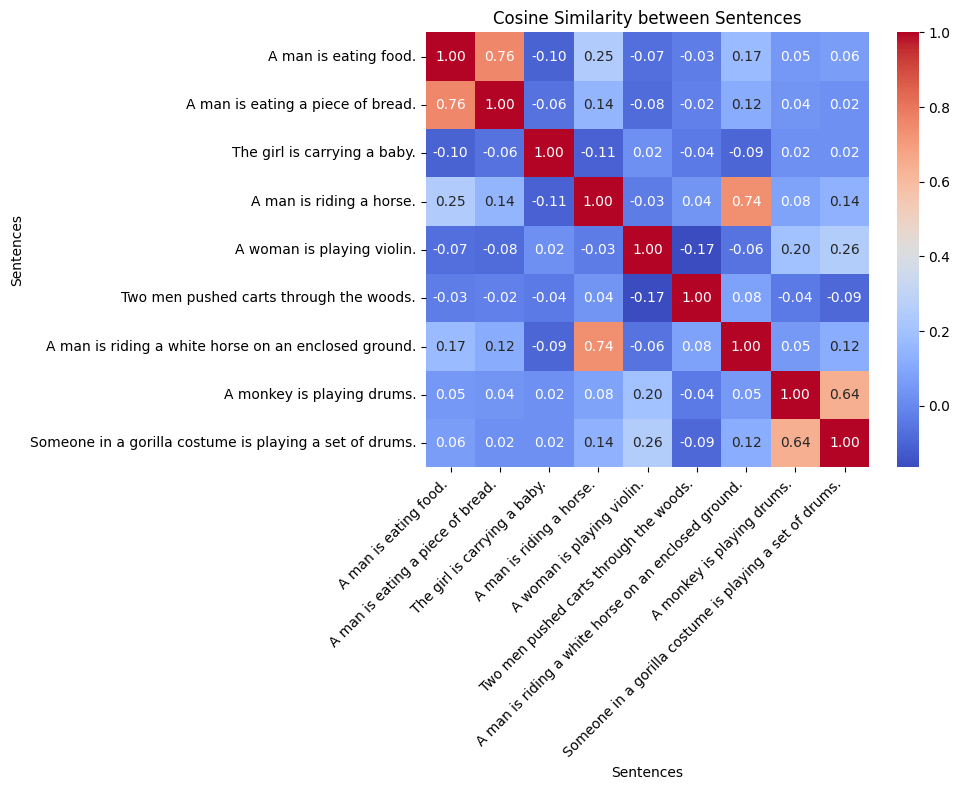

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize the cosine similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=sentences, yticklabels=sentences)
plt.title('Cosine Similarity between Sentences')
plt.xlabel('Sentences')
plt.ylabel('Sentences')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Semantic Search
Semantic search denotes search with meaning.

In [17]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('clips/mfaq')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
question = "<Q>What is AutoNLP used for on Hugging Face?"
answer_1 = "<A>AutoNLP is state of the art and a recent breakthrough in the field of NLP."
answer_2 = "<A>AutoNLP provides an interface for hosting unlimited private models and datasets on Hugging Face"
answer_3 = "<A>Based on how much training data and model variants are created, we send you a compute cost and payment link - as low as $10 per job."

In [25]:
query_embedding = model.encode(question)
corpus_embeddings = model.encode([answer_1, answer_2, answer_3])

In [26]:
print(util.semantic_search(query_embedding, corpus_embeddings))

[[{'corpus_id': 1, 'score': 0.5635679960250854}, {'corpus_id': 0, 'score': 0.5431358814239502}, {'corpus_id': 2, 'score': 0.4931076765060425}]]


we can use the question answering model to find the exact answer.

In [27]:
from transformers import pipeline

In [28]:
qa_model = pipeline("question-answering")
question = "What is AutoNLP used for on Hugging Face?"
context = "AutoNLP provides an interface for hosting unlimited private models and datasets on Hugging Face"
qa_model(question = question, context = context)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.7059758901596069,
 'start': 34,
 'end': 79,
 'answer': 'hosting unlimited private models and datasets'}

## Clustering

In [29]:
from sklearn.cluster import KMeans
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'Horse is eating grass.',
          'A man is eating pasta.',
          'A Woman is eating Biryani.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.',
          'The cheetah is chasing a man who is riding the horse.',
          'man and women with their baby are watching cheetah in zoo'
          ]
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [30]:
len(corpus_embeddings)

15

Let's  create 4 clusters.

In [35]:
clustering_model = KMeans(n_clusters=4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

[3 3 1 3 3 0 0 1 1 0 0 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


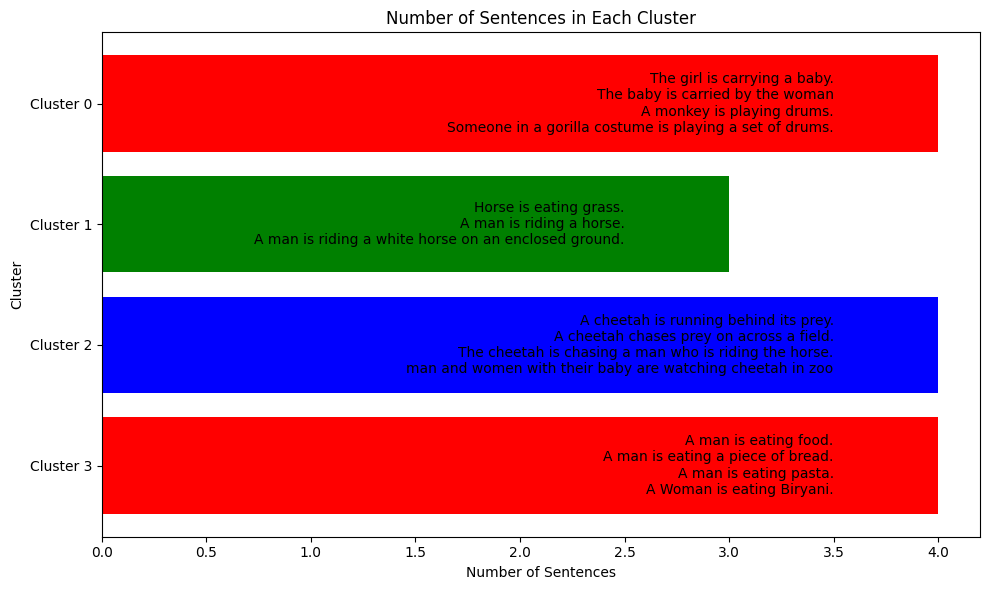

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Count the number of sentences in each cluster
cluster_counts = [np.sum(cluster_assignment == i) for i in range(max(cluster_assignment) + 1)]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(cluster_counts)), cluster_counts, color=colors)
plt.xlabel('Number of Sentences')
plt.ylabel('Cluster')
plt.yticks(range(len(cluster_counts)), [f'Cluster {i}' for i in range(len(cluster_counts))])
plt.title('Number of Sentences in Each Cluster')

# Annotate bars with sentences
for bar, count in zip(bars, cluster_counts):
    cluster_sentences = [corpus[i] for i, label in enumerate(cluster_assignment) if label == bars.index(bar)]
    cluster_sentences_str = '\n'.join(cluster_sentences)
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2, cluster_sentences_str, va='center', ha='right')

plt.gca().invert_yaxis()  # Invert y-axis to have Cluster 0 at the top
plt.tight_layout()
plt.show()


Again, create 5 clusters

In [37]:
clustering_model = KMeans(n_clusters=5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_
print(cluster_assignment)

[2 2 1 2 2 4 4 1 1 0 0 3 3 3 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


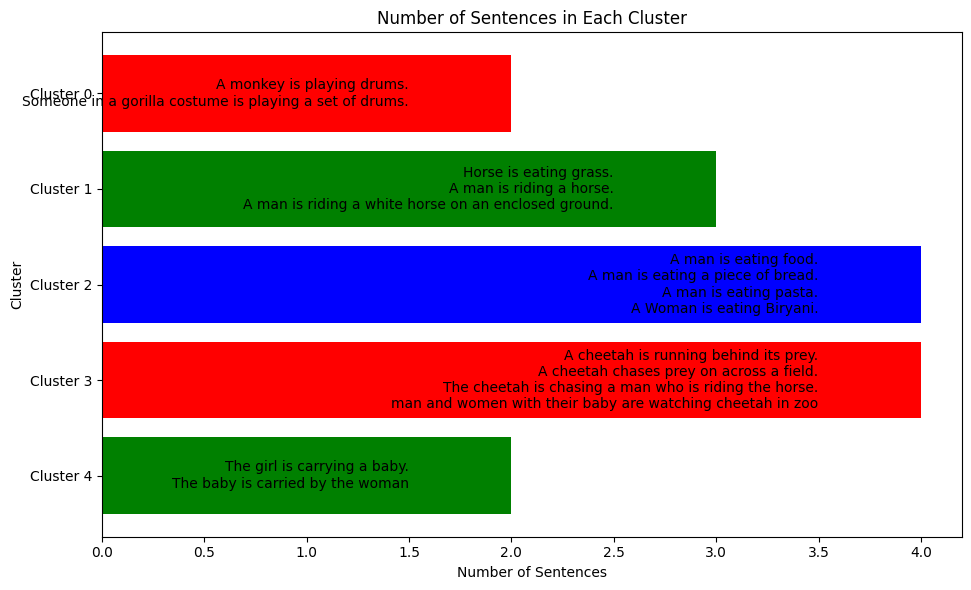

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Count the number of sentences in each cluster
cluster_counts = [np.sum(cluster_assignment == i) for i in range(max(cluster_assignment) + 1)]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(cluster_counts)), cluster_counts, color=colors)
plt.xlabel('Number of Sentences')
plt.ylabel('Cluster')
plt.yticks(range(len(cluster_counts)), [f'Cluster {i}' for i in range(len(cluster_counts))])
plt.title('Number of Sentences in Each Cluster')

# Annotate bars with sentences
for bar, count in zip(bars, cluster_counts):
    cluster_sentences = [corpus[i] for i, label in enumerate(cluster_assignment) if label == bars.index(bar)]
    cluster_sentences_str = '\n'.join(cluster_sentences)
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height() / 2, cluster_sentences_str, va='center', ha='right')

plt.gca().invert_yaxis()  # Invert y-axis to have Cluster 0 at the top
plt.tight_layout()
plt.show()
